In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df.head(7)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3


In [6]:
def kmeans(X, K, max_iters, plot=False):
    '''
    Implementing K means function
    '''
    centroids = X[:K]
    
    for i in range(max_iters):
        # assign each datapoint to to the nearest centroid 
        labels = np.argmin(np.linalg.norm(X[:,np.newaxis] - centroids, axis=2), axis=1)
        
        # update the centroids based on assigned points
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
        
        # Stop iterating if the centroids don't change
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
        
        # Plotting
        if plot:
            plt.figure()
            plt.scatter(X[:,0], X[:,1], c=labels)
            plt.scatter(centroids[:,0], centroids[:,1], marker="X", color="red")
            plt.title(f"Iteration {i+1}")
            plt.show()
    
    return labels, centroids

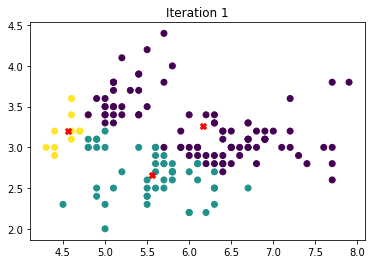

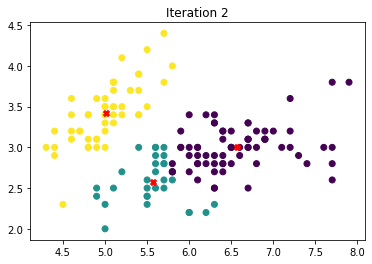

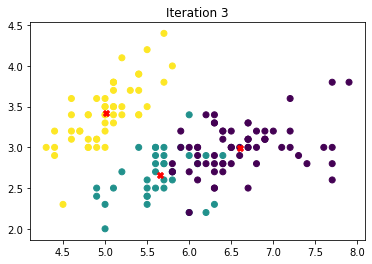

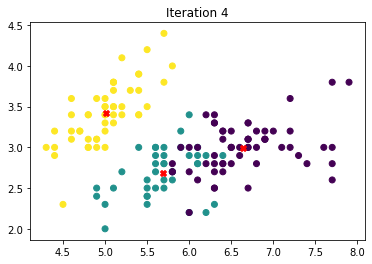

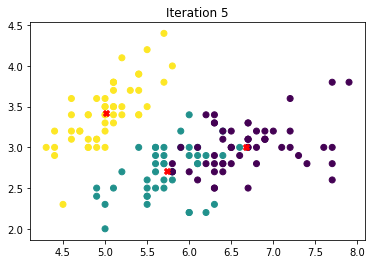

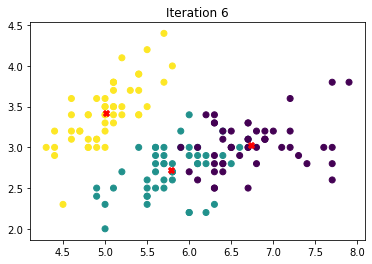

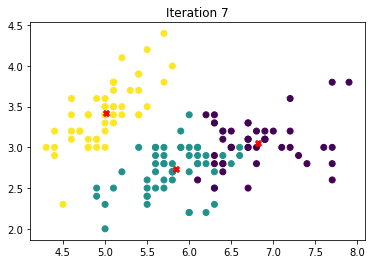

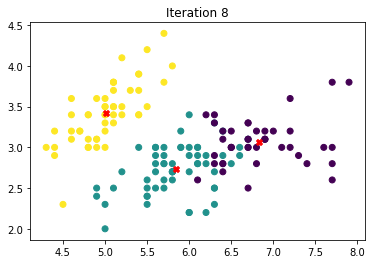

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]
[[6.83571429 3.06428571 5.6547619 ]
 [5.84655172 2.73275862 4.3637931 ]
 [5.006      3.428      1.462     ]]


In [7]:
X=np.array(df.iloc[:,:-1].values)
labels,c=kmeans(X,3,200,True)
print(labels)
print(c)

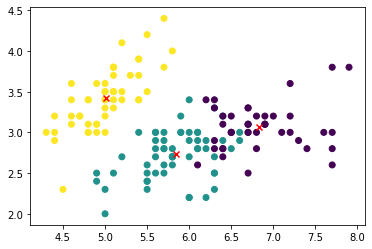

In [9]:
plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(c[:,0],c[:,1],marker="x",color="red")
plt.show()